# Proyek Analisis Data: E-commerce Public
- **Nama** : **Nugga Pratama**
- **Email** : **nuga12aja@gmail.com**
- **id** : **nugga_pratama_inEH**

# Pertanyaan Wajib
- bagaimana Revenue dan jumlah pengiriman perusahan tahun 2018?
- bagaimana demografi pelanggan?

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Data Wrangling

## Gathering Data
Dilakukan untuk meload data ke dalam program sehingga dapat dilakukan analisis lebih lanjut

### customer_df

In [2]:
customer_df = pd.read_csv('Data/olist_customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### order_payment_df

In [3]:
order_payment_df = pd.read_csv('Data/olist_order_payments_dataset.csv')
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### order_df

In [4]:
order_df = pd.read_csv('Data/olist_orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### order_item_df

In [5]:
order_item_df = pd.read_csv('Data/olist_order_items_dataset.csv')
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Assesing Data

### Menilai customer_df

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Dari hasil diatas didapatkan bahwa tidak terdapat baris yang null, sehingga tidak perlu dilakukan pengechekan terhadap null values. tipe data untuk setiap variabel juga tidak memiliki masalah

In [7]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


tidak terdapat informasi yang berarti dikarenakan dataset customer hanya memberikan informasi seputar kota, dan kode unik

In [8]:
duplikat = customer_df.duplicated().sum()
print('jumlah data duplikat : ' , duplikat)

jumlah data duplikat :  0


### Menilai order_payment_df

In [9]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Dari hasil diatas diapatkan bahwa setiap variabel memiliki jumlah yang sama. ini dapat disimpulkan bahwa tidak terdapat data yang null. lalu untuk tipe data di tiap variabel tidak memiliki kendala dan sesuai dengan format.

In [10]:
order_payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


terdapat payment_value 0, kemungkinan ada kesalahan input/inaccurate value pada data tersebut.

In [11]:
duplikat = order_payment_df.duplicated().sum()
print('Data yang duplikat adalah : ', duplikat)

Data yang duplikat adalah :  0


In [12]:
miss_input = (order_payment_df['payment_value'] == 0).sum()
print('jumlah data yang miss input pada payment_value :', miss_input)

jumlah data yang miss input pada payment_value : 9


In [13]:
order_payment_df['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

karena ada pembayaran yang tidak diketahui dengan jumlah yang sedikit. maka saya berinisiatif akan mengganti nilai tersebut dengan debit card. karna tidak terlalu banyak penambahan datanya

### Menilai order_df

In [14]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


dari hasil diatas, terdapat perbedaan jumlah baris yang mana mengindikasikan terdapat null value. lalu terdapat variabel yang tipe data nya salah harusnya yaitu variabel ke 3 hingga 7. yang mana variabel tersebut harus bertipe date.
- note: jumlah baris order_df dengan customer_df sama sehingga dapat disimpulkan bahwa seluruh orderan jumlahnya harus 994411
- hal itu disebabkan karena order_id merupakan kode unik yang muncul setiap melakukan orderan baru

In [15]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [16]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

terdapat banyak data yang memiliki nilai null
- order_approved_at                 160
- order_delivered_carrier_date     1783
- order_delivered_customer_date    2965

In [17]:
duplikat = order_df.duplicated().sum()
print('Jumlah data duplikat : ', duplikat)

Jumlah data duplikat :  0


### Menilai order_item_df

In [18]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


tidak terdapat kesalahan pada tipe data dan tidak terdapat indikasi nilai null

In [19]:
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


dikarenakan order_item berinformasikan tentang harga barang serta harga mengiriman. jadi ini menjadi gambaran berapa pembayaran terkecil. data terkecil harga adalah 0.85

In [20]:
duplikat = order_item_df.duplicated().sum()
print('data yang terduplikat adalah : ', duplikat)

data yang terduplikat adalah :  0


## Cleaning Data

### perbaikan payment_df

#### Perbaikan payment_type

In [21]:
order_payment_df['payment_type'].replace('not_defined', 'debit_card', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_2552\2149025437.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_payment_df['payment_type'].replace('not_defined', 'debit_card', inplace=True)


In [22]:
order_payment_df['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1532
Name: count, dtype: int64

#### Perbaikan inaccurate value order_payment

- untuk mengisi order_payment, kita diharuskan untuk menghitung total harga dari dataset order_item_df.
- payment = count(order_id) * (price + freight_value )
- ini didasarkan dengan dokumentasi yang ada pada dataset di kaggle

In [23]:
agg_order_item = order_item_df.groupby('order_id').agg({
    'order_id' : 'value_counts',
    'price' : 'sum',
    'freight_value' : 'sum'
})

agg_order_item.rename(columns={'order_id': 'order_count'}, inplace=True)

agg_order_item.reset_index(inplace=True)

agg_order_item['total'] = agg_order_item['order_count'] * (agg_order_item['price'] + agg_order_item['freight_value'])
agg_order_item.head()

,order_id,order_count,price,freight_value,total
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,218.04


Dari program diatas kita mendapatkan total dari setiap orderan. selanjutnya kita akan mengechek apakah semua orderan telah memberikan payment yang sesuai dengan harga total

In [24]:
order_payment_item = pd.merge(order_payment_df, agg_order_item, how='left', on='order_id')
order_payment_item

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_count,price,freight_value,total
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1.0,79.80,19.53,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1.0,17.00,7.39,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1.0,56.99,8.72,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1.0,89.90,17.88,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1.0,113.57,14.88,128.45
...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,1.0,297.00,66.31,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,1.0,79.00,17.80,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,1.0,39.99,7.78,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,1.0,349.00,20.54,369.54


dapat dilihat bahwa payment_value dan nilai total itu sama. agar memperbaiki inaccurate value pada data sebelumnya maka payment_value dihapus dan digunakan total saja

In [25]:
order_payment_item.drop('payment_value', axis=1, inplace=True)

order_payment_item.rename(columns={'total': 'total_payment'}, inplace=True)


### Perbaikan order_df

In [26]:
change_datetime = order_df.iloc[: , 3:]
for change_datetime in change_datetime:
    order_df[change_datetime] = pd.to_datetime(order_df[change_datetime])

In [27]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [28]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

untuk mengisi kolom tanggal ini, menurut saya tricky. karna jika salah tanggal/berfokus pada mean,modus, median akan menghasilkan data yang salah. itu dikarenakan rentang data yang besar serta banyak pertimbangan seperti tahun, bulan dan lain-lain. oleh karna itu untuk mengisinya data yang kosong, saya mencoba dengan kalkulasi sederhana

In [29]:
#menghitung jarak approve
time_approve = (order_df['order_approved_at'] - order_df['order_purchase_timestamp']).dt.days

order_df['order_approved_at'] = order_df['order_approved_at'].fillna(order_df['order_purchase_timestamp'] + pd.Timedelta(days=time_approve.median()))


In [30]:
#menghitung jarak order_delivered
time_delivered= (order_df['order_delivered_carrier_date'] - order_df['order_approved_at']).dt.days
time_delivered.median()

order_df['order_delivered_carrier_date'] = order_df['order_delivered_carrier_date'].fillna(order_df['order_approved_at'] + pd.Timedelta(time_delivered.median()))


In [31]:
#menghitung jarak order_estimate
time_estimate = (order_df['order_delivered_customer_date'] - order_df['order_estimated_delivery_date']).dt.days
order_df['order_delivered_customer_date'] = order_df['order_delivered_customer_date'].fillna(order_df['order_estimated_delivery_date'] + pd.Timedelta(time_estimate.median()))

In [32]:
order_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

# Exploratory Data Analysis (EDA)

## Explore customer

In [33]:
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
25794,f94ce64db2a1734b3a34e61957627187,6fd11ed41ea931e9ba7ef26aa9d60ebe,3191,sao paulo,SP
78788,e61954c72673483f567045281f4abd8a,91316fd0820d2c35d8e6685d4d2950fb,4890,sao paulo,SP
8105,0adc4805de3051fab8d98080c6cb2775,97e54323b78a86d896c273c9ff83c570,14780,barretos,SP
51661,a7cfd46328adb24558e5e875834a8672,7229cb1e6d07a9106f98ff82eab3f3b0,97035,santa maria,RS
55873,c781fa3d6c98179000534f31d861c594,de8b647f9e5db76b2cac2068f3fbfa65,9641,sao bernardo do campo,SP


In [34]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [35]:
customer_count_city =  customer_df['customer_city'].value_counts().reset_index(name='customer_count')
customer_count_city

,customer_city,customer_count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,olhos d'agua,1
4115,pacotuba,1
4116,sao sebastiao do paraiba,1
4117,benedito leite,1


dapat melihat **demografi pelanggan** berdasarkan **kota** dan dapat dilihat bahwa **sao paulo** memiliki **pelanggan terbanyak**

In [36]:
customer_count_state = customer_df.groupby(by=['customer_state','customer_city']).agg({
       'customer_id' : 'nunique',
})
customer_count_state

customer_id
customer_state customer_city                       
AC             brasileia                          1
               cruzeiro do sul                    3
               epitaciolandia                     1
               manoel urbano                      1
               porto acre                         1
...                                             ...
TO             silvanopolis                       1
               sitio novo do tocantins            2
               taguatinga                         3
               tocantinopolis                     7
               xambioa                            3

[4310 rows x 1 columns]

In [37]:
customer_count_state =  customer_df['customer_state'].value_counts().reset_index(name='customer_count')
customer_count_state

,customer_state,customer_count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


melihat **demografi pelanggan** berdasarkan **state** dapat dilihat bahwa:
-	SP memiliki	41746 pelanggan
-	RJ memiliki	12852 pelanggan
-	MG memiliki	11635 pelanggan

## Explore order_df

In [38]:
order_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
94363,5a902cc5a20f8cd076f116d16d5aef9d,ec5637e1b926c79b5472bd41d67882f8,delivered,2017-10-03 20:12:45,2017-10-03 20:25:04,2017-10-06 23:03:01,2017-10-18 16:17:24,2017-10-30
10244,fca08869e5ebde633b5183dfdbc8e1be,3abe005e945a20bc0eb53214c15bd8a1,delivered,2018-07-09 11:28:58,2018-07-09 11:45:13,2018-07-10 14:54:00,2018-07-12 23:15:34,2018-07-26
68992,ad87f982d1ef40d7a0bc339828e35616,2d691a5872478b245f5c80c7077b8901,delivered,2018-07-21 19:35:02,2018-07-21 19:45:14,2018-07-23 10:43:00,2018-08-06 12:27:01,2018-08-15
41405,2c4f41fd30cdd44de346e77247380dd2,a2378de6cd63315863ff5b54a9755753,delivered,2017-03-23 16:28:47,2017-03-23 16:43:40,2017-03-24 19:30:13,2017-03-29 12:33:48,2017-04-19
29544,869fbc1490b3463106241d10454b6eab,88aa57af603d46615d5d2dd0c8b35949,delivered,2018-06-21 11:16:18,2018-06-22 04:36:03,2018-06-22 12:55:00,2018-06-25 15:48:45,2018-07-04


In [39]:
delivery_preparation_time = order_df['order_delivered_customer_date'] - order_df['order_approved_at']
delivery_preparation_time = delivery_preparation_time.apply(lambda x: x.total_seconds())
order_df['preparation_time'] = round(delivery_preparation_time/86400)
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,preparation_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0


In [40]:
delivered_on_schedule_time = (order_df['order_estimated_delivery_date'] - order_df['order_delivered_customer_date']).dt.days
order_df['delivered_on_schedule_time'] = delivered_on_schedule_time
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,preparation_time,delivered_on_schedule_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,5
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,17
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,12
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,9
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,10
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,1
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,5
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,20


In [41]:
order_df[['preparation_time', 'delivered_on_schedule_time']].describe()

,preparation_time,delivered_on_schedule_time
count,99441.000000,99441.000000
mean,12.476473,10.552569
std,9.790313,10.200044
min,-146.000000,-189.000000
25%,6.000000,6.000000
50%,10.000000,11.000000
75%,16.000000,16.000000
max,209.000000,146.000000


kedua program diatas digunakan untuk melihat waktu yang dihabiskan perusahaan untuk menyiapkan barang agar siap diantar (preparation_time). lalu waktu yang dihabiskan dari pengantaran hingga estimasinya (delivered_on_schedule_time).

Dikarenakan terdapat data yang memiliki hasil minus (-). ini mungkin disebabkan oleh kesalahan dalam penginputan. sehingga kita perlu mengurutkan terlebih dahulu. berikut programnya 

In [42]:

def susun_tanggal(row):
    return pd.Series(sorted([row['order_estimated_delivery_date'], 
                             row['order_delivered_customer_date'], 
                             row['order_approved_at']], reverse=True),
                     index=['order_estimated_delivery_date', 
                            'order_delivered_customer_date', 
                            'order_approved_at'])


order_df[['order_estimated_delivery_date', 'order_delivered_customer_date', 'order_approved_at']] = order_df.apply(susun_tanggal, axis=1)


In [43]:
delivery_preparation_time = order_df['order_delivered_customer_date'] - order_df['order_approved_at']
delivery_preparation_time = delivery_preparation_time.apply(lambda x: x.total_seconds())
order_df['preparation_time'] = round(delivery_preparation_time/86400)

delivered_on_schedule_time = (order_df['order_estimated_delivery_date'] - order_df['order_delivered_customer_date']).dt.days
order_df['delivered_on_schedule_time'] = delivered_on_schedule_time

order_df[['preparation_time', 'delivered_on_schedule_time']].describe()

,preparation_time,delivered_on_schedule_time
count,99441.000000,99441.000000
mean,11.724641,12.028147
std,7.464925,8.333337
min,0.000000,0.000000
25%,6.000000,7.000000
50%,10.000000,12.000000
75%,16.000000,16.000000
max,145.000000,188.000000


- terdapat waktu tercepat dalam persiapan dan pengantaran adalah 0 hari. bisa jadi tempatnya dekat sampai dalam hitungan jam. 
- waktu terlama yaitu 145 hari untuk persiapan dapat disebabkan oleh pembayaran yang lambat, sedang dibuat/proses
- pengiriman terlama yaitu 188 hari
- rata" persiapan dan pengantaran berada di 12 hari

In [44]:
order_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

untuk melihat bagaimana status kinerja dari perusahaan. Sebagian besar

## Explore customer and order

In [45]:
customer_order_df = pd.merge(customer_df, order_df, how='left', on='customer_id')
customer_order_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,preparation_time,delivered_on_schedule_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,9.0,10
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,17.0,7
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-13 00:00:00,2018-06-14 17:58:51,23.0,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,15.0,12
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,11.0,5


In [46]:
customer_order_df.groupby('customer_city').preparation_time.max().sort_values(ascending=False)

customer_city
rio de janeiro       145.0
sorocaba             144.0
brasilia             142.0
sao paulo            106.0
sao sebastiao         80.0
                     ...  
barao de juparana      4.0
moeda                  3.0
iomere                 3.0
meridiano              3.0
siriji                 3.0
Name: preparation_time, Length: 4119, dtype: float64

untuk melihat kota yang memiliki persiapan pengiriman terlama, yaitu:
1. rio de janeiro       145 hari
2. sorocaba             144 hari 
3. brasilia             142 hari

In [47]:
customer_order_df.groupby('customer_city').delivered_on_schedule_time.max().sort_values(ascending=False)

customer_city
rio de janeiro       188
montanha             181
salto                175
paulinia             167
lagarto              166
                    ... 
piao                   0
galinhos               0
baguari                0
avai                   0
vitoria do mearim      0
Name: delivered_on_schedule_time, Length: 4119, dtype: int64

kota dengan pengiriman terlama ada berada di:
1. rio de janeiro 188 hari 
2. montanha             181 hari
3. salto                175 hari

hal ini mungkin disebabkan oleh kebutuhan untuk melakukan persiapan yang lebih matang sebelum pengiriman, mengingat jarak yang jauh. Waktu persiapan yang lama juga dapat dipengaruhi oleh kewajiban untuk memenuhi kuota tertentu sebelum barang dikirim, karena jaraknya yang jauh dan pengiriman dilakukan dalam satu kali perjalanan

In [48]:
order_status_counts = customer_order_df.groupby(['customer_state', 'customer_city'])['order_status'].value_counts().unstack(fill_value=0)
order_status_counts = order_status_counts[['delivered', 'shipped']]
order_status_counts.sort_values(by=['delivered', 'shipped'], ascending=False)

order_status                         delivered  shipped
customer_state customer_city                           
SP             sao paulo                 15045      141
RJ             rio de janeiro             6601      170
MG             belo horizonte             2697       26
DF             brasilia                   2071       30
PR             curitiba                   1489        5
...                                        ...      ...
SC             alto bela vista               0        0
               lebon regis                   0        0
               sao joao do itaperiu          0        0
SP             avai                          0        0
               monteiro lobato               0        0

[4310 rows x 2 columns]

dari sini dapat dilihat bahwa **sao paulo** merupakan kota **tersibuk** dalam pengiriman barang. lalu diikuti kota
- rio de janeiro
- belo horizonte

In [49]:
customer_order_df.groupby(['customer_state', 'customer_city']).agg({
    'preparation_time': 'sum',
    'delivered_on_schedule_time': 'sum'
}).sort_values(by=['preparation_time', 'delivered_on_schedule_time'], ascending=False)

,,preparation_time,delivered_on_schedule_time
customer_state,customer_city,,
SP,sao paulo,118636.0,157835
RJ,rio de janeiro,92146.0,100268
MG,belo horizonte,29560.0,33538
DF,brasilia,26630.0,24766
BA,salvador,21794.0,14041
...,...,...,...
PR,contenda,4.0,9
PE,siriji,3.0,24
MG,moeda,3.0,12


dan disini dapat disimpulkan bahwa kota ini memiliki jalur pengiriman yang sangat sibuk.

## Explore order_payment_item

In [50]:
order_payment_item.head()

,order_id,payment_sequential,payment_type,payment_installments,order_count,price,freight_value,total_payment
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,1.0,79.80,19.53,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,1.0,17.00,7.39,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,1.0,56.99,8.72,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,1.0,89.90,17.88,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,1.0,113.57,14.88,128.45


In [51]:
order_payment_item.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,order_count,price,freight_value,total_payment
count,103886,103886.000000,103886,103886.000000,103056.000000,103056.000000,103056.000000,103056.000000
unique,99440,NaN,4,NaN,NaN,NaN,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN,NaN,NaN,NaN
freq,29,NaN,76795,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,1.141137,137.877614,22.875218,205.514251
std,NaN,0.706584,NaN,2.687051,0.534830,211.121182,21.603711,611.639021
min,NaN,1.000000,NaN,0.000000,1.000000,0.850000,0.000000,9.590000
25%,NaN,1.000000,NaN,1.000000,1.000000,45.900000,13.860000,62.680000
50%,NaN,1.000000,NaN,1.000000,1.000000,86.000000,17.200000,109.180000
75%,NaN,1.000000,NaN,4.000000,1.000000,149.900000,24.062500,195.940000


**rata-rata**
- rata" harga barang adalah 134.75 dollar
- rata" harga freight_value / harga pengiriman adalah 22.82 dollar
- rata" total harga barang yaitu 205.7 dollar

**rentang**
- rentang payment_installment / cicilan yaitu 0 hingga 24 kali bayar
- rentang harga barang yaitu dari 0.85 dollar hingga 13440 dolar
- rentang harga pengiriman adalah 0 hingga 1794 dollar
- total harga barang berada direntang 9.59 dollar hingga 109312 dollar

In [52]:
order_payment_item.groupby('payment_type').agg({
    'order_id' : 'nunique',
    'total_payment' : 'sum'
}).sort_values(by='total_payment', ascending=False)

,order_id,total_payment
payment_type,,
credit_card,76505,15936964.47
boleto,19784,4059699.73
voucher,3866,929067.67
debit_card,1531,253744.83


- **credit card** merupakan **alat pembayaran** yang paling **banyak digunakan** serta mendapatkan **pembayaran terbanyak**
- lalu diikuti dengan **boleto** merupakan **alat pembayaran** terbanyak **ke-2** dan mendapatkan **pembayaran terbanyak ke 2**
- lalu diikuti dengan **voucher** merupakan **alat pembayaran** terbanyak **ke-3** dan mendapatkan **pembayaran terbanyak ke 3**
- lalu diikuti dengan **debit_Card** merupakan **alat pembayaran** terbanyak **ke-1** dan mendapatkan **pembayaran terbanyak ke 4**

## explore all_df

In [53]:
all_df = pd.merge(customer_order_df, order_payment_df, how='left', on='order_id')
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,preparation_time,delivered_on_schedule_time,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,9.0,10,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,17.0,7,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-13 00:00:00,2018-06-14 17:58:51,23.0,1,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,15.0,12,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,11.0,5,1.0,credit_card,8.0,252.25


In [54]:
all_df.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
preparation_time                 0
delivered_on_schedule_time       0
payment_sequential               1
payment_type                     1
payment_installments             1
payment_value                    1
dtype: int64

In [55]:
all_df = all_df.dropna()
all_df.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
preparation_time                 0
delivered_on_schedule_time       0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

In [56]:
all_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,preparation_time,delivered_on_schedule_time,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886,103886.000000,103886,103886,103886,103886,103886,103886,103886,103886,103886,103886.000000,103886.000000,103886.000000,103886,103886.000000,103886.000000
unique,99440,96095,NaN,4119,27,99440,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,9af2372a1e49340278e7c1ef8d749f34,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,fa65dad1b0e818e3ccc5cb0e39231352,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,credit_card,NaN,NaN
freq,29,33,NaN,16221,43622,29,100756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76795,NaN,NaN
mean,NaN,NaN,35072.550555,NaN,NaN,NaN,NaN,2017-12-29 21:48:47.671803648,2017-12-30 08:03:30.350634496,2018-01-02 02:20:09.466598400,2018-01-11 02:19:29.347371264,2018-01-23 11:01:15.663275264,11.744980,12.040044,1.092679,NaN,2.853349,154.100380
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-29 23:59:59.999999988,2016-10-04 10:26:40.000000001,2016-09-30 00:00:00,2016-10-07 13:16:46,0.000000,0.000000,1.000000,NaN,0.000000,0.000000
25%,NaN,NaN,11366.250000,NaN,NaN,NaN,NaN,2017-09-10 09:01:08.750000128,2017-09-10 17:50:35.249999872,2017-09-12 21:13:06.249999872,2017-09-20 17:24:49.750000128,2017-10-02 00:00:00,6.000000,7.000000,1.000000,NaN,1.000000,56.790000
50%,NaN,NaN,24360.000000,NaN,NaN,NaN,NaN,2018-01-17 14:07:54,2018-01-17 18:24:37.500000,2018-01-20 01:14:19,2018-01-31 00:39:56,2018-02-14 00:00:00,10.000000,12.000000,1.000000,NaN,1.000000,100.000000
75%,NaN,NaN,58418.000000,NaN,NaN,NaN,NaN,2018-05-03 18:35:58.249999872,2018-05-04 03:31:40.500000,2018-05-07 14:15:00,2018-05-14 19:19:10.249999872,2018-05-25 00:00:00,16.000000,16.000000,1.000000,NaN,4.000000,171.837500
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18.000000001,2018-11-11 23:59:59.999999988,2018-11-12 00:00:00,145.000000,188.000000,29.000000,NaN,24.000000,13664.080000


In [57]:
# kota dengan revenue terbanyak
city_revenue =  all_df.groupby('customer_city').agg({
    'payment_value' : ['sum', 'max']
}).sort_values(('payment_value', 'sum'), ascending=False)

city_revenue

payment_value          
                                       sum       max
customer_city                                       
sao paulo                       2203373.09   4513.32
rio de janeiro                  1161927.36  13664.08
belo horizonte                   421765.12   3351.35
brasilia                         354216.78   3736.22
curitiba                         247392.48   3126.50
...                                    ...       ...
santo antonio do rio abaixo          24.23     24.23
tamboara                             24.09     24.09
jenipapo de minas                    22.58     22.58
polo petroquimico de triunfo         20.70     20.70
sabaudia                             20.42     20.42

[4119 rows x 2 columns]

dari hasil diatas diapatkan bahwa **sao paulo** adalah kota yang memiliki **revenue** terbesar yaitu **2203373.09 $**

In [58]:
# kota dengan revenue terbanyak
city_revenue =  all_df.groupby('customer_state').agg({
    'payment_value' : ['sum', 'max']
}).sort_values(('payment_value', 'sum'), ascending=False)

city_revenue

payment_value          
                         sum       max
customer_state                        
SP                5998226.96   6726.66
RJ                2144379.69  13664.08
MG                1872257.26   6081.54
RS                 890898.54   2455.12
PR                 811156.38   3126.50
SC                 623086.43   3782.19
BA                 616645.82   3358.24
DF                 355141.08   3736.22
GO                 350092.31   4809.44
ES                 325967.55   7274.88
PE                 324850.44   3792.59
CE                 279464.03   2734.11
PA                 218295.85   4042.74
MT                 187029.29   3242.84
MA                 152523.02   3195.73
PB                 141545.72   4681.78
MS                 137534.84   6929.31
PI                 108523.97   1989.75
RN                 102718.13   1821.82
AL                  96962.06   2269.98
SE                  75246.25   1729.98
TO                  61485.33   2784.16
RO                  60866.20   2452.12
AM                  27966.93   1853.75
AC                  19680.62   1251.70
AP                  16262.80   1482.42
RR                  10064.62    994.77

dari hasil diatas diapatkan bahwa **SP** adalah **STATE** yang memiliki **revenue** terbesar yaitu **5998226.96 $**

In [59]:
# demografi pelanggan berdasarkan tipe pembayaran
type_customer_count = all_df['payment_type'].value_counts()
type_customer_count

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1532
Name: count, dtype: int64

# Visualization & Explanatory Analysis

## Bagaimana Revenue dan jumlah pengiriman perusahan yang telah sukses tahun 2018?

In [60]:
all_df.head()
all_df = all_df[all_df['order_approved_at'].dt.year == all_df['order_approved_at'].dt.year.max()]


In [61]:
revenue_df = all_df[all_df['order_approved_at'].dt.year == all_df['order_approved_at'].dt.year.max()]
revenue_df['order_status'].value_counts()

order_status
delivered      54805
shipped          583
canceled         348
unavailable      149
invoiced         126
processing        60
created            1
Name: count, dtype: int64

In [62]:
status = ['delivered', 'shipped', 'invoiced', 'processing', 'created']
filtered_df = revenue_df[revenue_df['order_status'].isin(status)]
revenue_df = filtered_df.resample(rule='M', on='order_approved_at').agg({
    'customer_id' : 'nunique',
    'payment_value' : 'sum'
})

revenue_df['month'] = revenue_df.index.strftime('%B')

revenue_df = revenue_df.reset_index(drop=True)
revenue_df

C:\Users\User\AppData\Local\Temp\ipykernel_2552\2834085821.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  revenue_df = filtered_df.resample(rule='M', on='order_approved_at').agg({


,customer_id,payment_value,month
0,7108,1094109.12,January
1,6605,972073.93,February
2,7249,1164078.78,March
3,6758,1133265.80,April
4,7026,1171843.38,May
5,6142,1024631.63,June
6,6125,1018528.62,July
7,6575,1025627.89,August
8,1,166.46,September


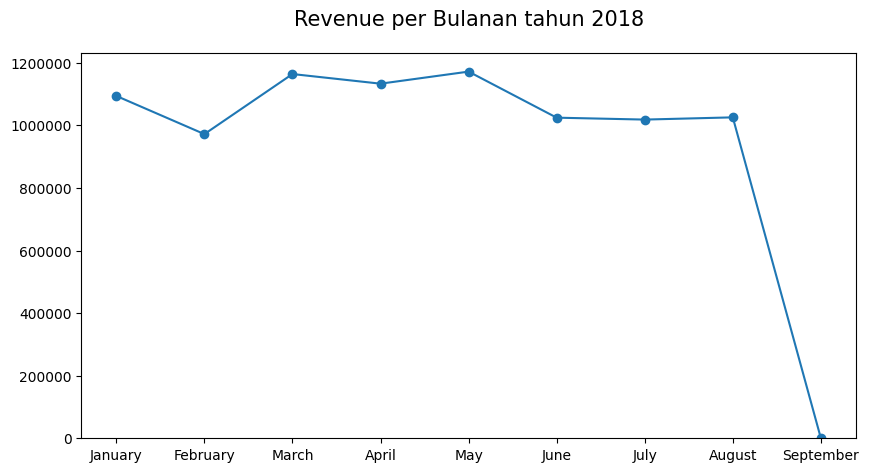

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(revenue_df['month'], revenue_df['payment_value'], marker='o')
plt.title('Revenue per Bulanan tahun 2018', loc='center', fontsize=15 ,pad=20)
plt.xticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(bottom=0)
plt.show()

dapat dilihat 
- pendapatan mengalami **peningkatan dan penurunan**
- pendapatan dengan **peningkatan tertinggi** ada pada bulan **maret**
- **pendapatan tertinggi** ada pada bulan **may**
- pendapatan **menurun tajam** di bulan **september** dan bulan tersebut merupakan pendapatan terendah

In [64]:
filter_order = filtered_df[filtered_df['order_status']=='delivered']
ordered_df = filter_order.resample(rule='M', on='order_approved_at').agg({
    'order_id' : 'nunique'
})
ordered_df['month'] = ordered_df.index.strftime('%B')
ordered_df

C:\Users\User\AppData\Local\Temp\ipykernel_2552\1649022013.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ordered_df = filter_order.resample(rule='M', on='order_approved_at').agg({


,order_id,month
order_approved_at,,
2018-01-31,6991,January
2018-02-28,6536,February
2018-03-31,7083,March
2018-04-30,6639,April
2018-05-31,6940,May
2018-06-30,6097,June
2018-07-31,6050,July
2018-08-31,6504,August


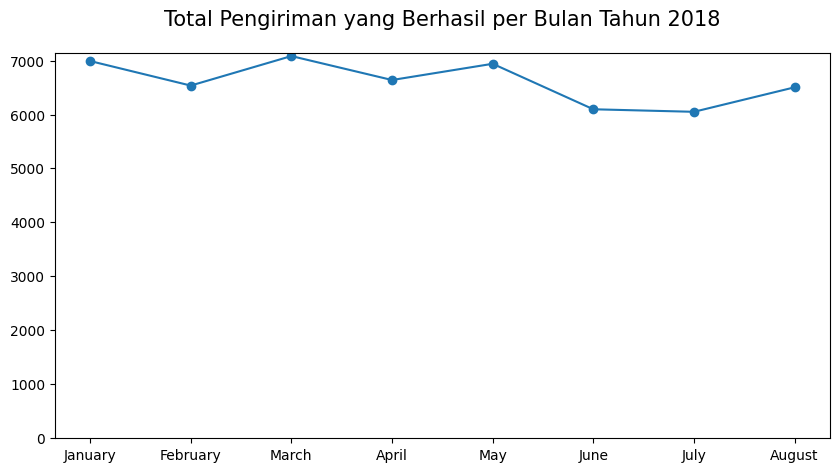

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(ordered_df['month'], ordered_df['order_id'], marker='o')
plt.title('Total Pengiriman yang Berhasil per Bulan Tahun 2018', loc='center',fontsize=15,pad=20)
plt.ylim(bottom=0)
plt.show()

Dapat dilihat bahwa:
- jumlah pengiriman yang sukses menurun perlahan walau pada beberapa bulan ada sedikit peningkatan
- **pengiriman tertinggi** pada bulan **maret**
- **penurunan tajam** berada pada bulan **juni**
- **peningkatan tertinggi** ada pada bulan **agustus**

## Bagaimana demografi pelanggan berdasarkan tipe pembayaran

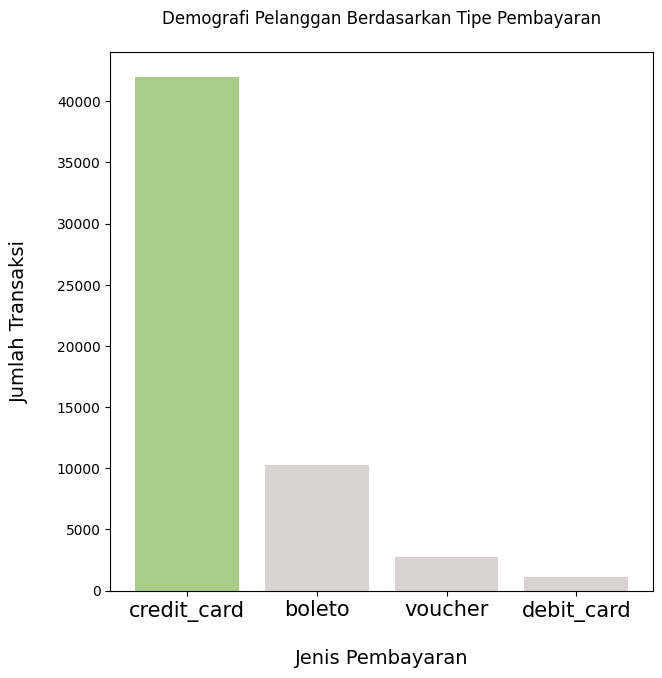

In [66]:
type_customer_df = all_df['payment_type'].value_counts().reset_index()

max_count = type_customer_df['count'].max()

colors = ['#A8CD89' if value == max_count else '#DBD3D3' for value in type_customer_df['count']]

plt.figure(figsize=(7,7))
plt.bar(type_customer_df['payment_type'], type_customer_df['count'], color=colors)
plt.title('Demografi Pelanggan Berdasarkan Tipe Pembayaran', loc='center', pad=20)
plt.xlabel('Jenis Pembayaran', fontsize=14, labelpad=20) 
plt.ylabel('Jumlah Transaksi', fontsize=14, labelpad=20)  
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.show()

disini didapatkan fakta bahwa pembayaran terbanyak menggunakan kartu credit. visualisasi ini berguna untuk melihat perilaku dari pelanggan

## Bagaimana demografi pelanggan berdasarkan state?

In [67]:

geo_df = gpd.read_file('Data/brazil-states.geojson')

geo_df = geo_df[['geometry', 'name', 'sigla']]

dalam map yang didapatkan, semua dikelompokkan berdasarkan provinsi. jadi semua kota sesuai yang memiliki state yang sama akan dilebur menjadi nama provinsi. 

In [68]:
geo_all_df = geo_df.merge(all_df, left_on='sigla', right_on='customer_state', how='left')
geo_all_df.drop(columns='customer_city')
geo_all_df.head()

,geometry,name,sigla,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,preparation_time,delivered_on_schedule_time,payment_sequential,payment_type,payment_installments,payment_value
0,"MULTIPOLYGON (((-73.60818 -7.20194, -72.86963 ...",Acre,AC,ca077dd95290191565abb393a580bbfc,70f326d437e44cf69da00c9169b74fb3,69911,rio branco,AC,cd02e1b6a025f2d7003c4c8b2ef28baf,delivered,...,2018-02-19 13:50:43,2018-02-20 19:19:17,2018-03-08 19:45:24,2018-03-29,17.0,20,1.0,credit_card,8.0,106.40
1,"MULTIPOLYGON (((-73.60818 -7.20194, -72.86963 ...",Acre,AC,16aba5570b45f6b4c9204407132e2cae,5f8f12098427d3cbb37e9dcf269bb53c,69918,rio branco,AC,f00cdb8585a46952303de92749d24590,delivered,...,2018-04-13 20:15:09,2018-04-16 15:32:32,2018-05-05 20:11:43,2018-05-22,22.0,16,1.0,boleto,1.0,56.41
2,"MULTIPOLYGON (((-73.60818 -7.20194, -72.86963 ...",Acre,AC,74359c5e719163f7edb9a3f29ba6fbab,443e23b582e69ae01d4d254f6e7dd3ea,69919,rio branco,AC,f7e9d1102c74fbea13db18cf2208fe3f,delivered,...,2018-01-10 10:32:22,2018-01-10 20:10:08,2018-01-26 22:18:15,2018-02-26,16.0,30,1.0,boleto,1.0,162.02
3,"MULTIPOLYGON (((-73.60818 -7.20194, -72.86963 ...",Acre,AC,382b155c9a94793ddbd99d8f8b0887f8,de65189d40231f22bc5045a8b9842f00,69919,rio branco,AC,ddb4b2115723295bbe34444bbcb2c1d5,delivered,...,2018-08-11 00:05:18,2018-08-21 14:07:00,2018-08-29 14:46:56,2018-09-20,19.0,21,1.0,credit_card,4.0,220.39
4,"MULTIPOLYGON (((-73.60818 -7.20194, -72.86963 ...",Acre,AC,8ff83690a72dc5589bc39742798a128b,c6bc2bf4b75f3f9da5ce95971a2f463b,69915,rio branco,AC,b8d8f5e99979f7cbf541344ae12c8cf4,delivered,...,2018-07-29 21:15:17,2018-08-02 13:23:00,2018-08-15 17:07:32,2018-09-20,17.0,35,1.0,credit_card,8.0,591.88


In [69]:
customer_geo = geo_all_df.groupby('sigla').agg({
    'name' : 'unique',
    'customer_id': 'nunique',
    'geometry': 'first'
}).reset_index()
customer_geo = gpd.GeoDataFrame(customer_geo, geometry='geometry')

In [70]:
max_count = customer_geo[customer_geo['customer_id'] == customer_geo['customer_id'].max()]
low_count = customer_geo[customer_geo['customer_id'] == customer_geo['customer_id'].min()]
point_df = pd.concat([max_count,low_count])

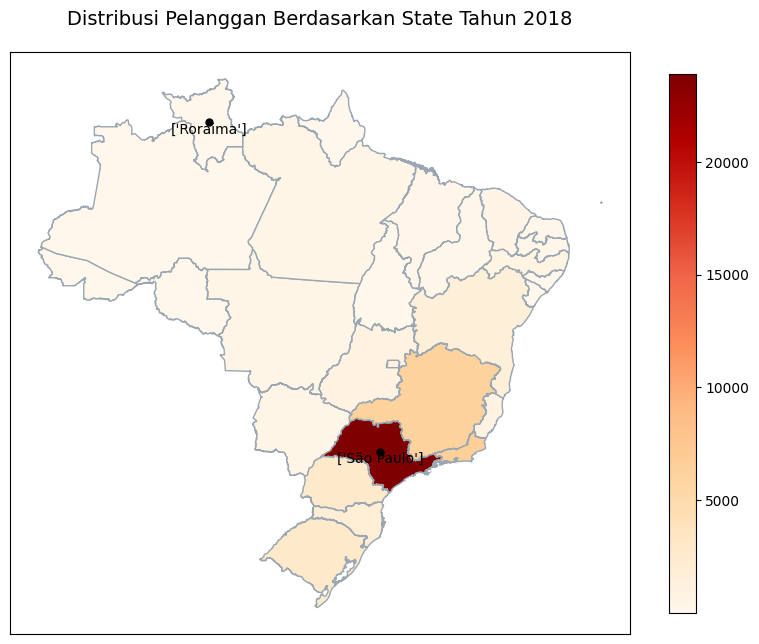

In [71]:
ax = customer_geo.plot(column='customer_id', cmap='OrRd', 
                       figsize=(10, 10), legend=True, 
                       edgecolor='#9AA6B2', 
                       legend_kwds={'shrink': 0.7})

ax.set_title('Distribusi Pelanggan Berdasarkan State Tahun 2018', fontsize=14, pad=20)

for idx, point in point_df.iterrows():
    X, y = point['geometry'].centroid.x , point['geometry'].centroid.y  
    
    ax.plot(X, y, marker='o', color='black', markersize=5)
    ax.text(X,y, point['name'], fontsize=10, color='black', ha='center', verticalalignment='top')


ax.set_xticks([])  
ax.set_yticks([])
plt.show()


berdasarkan gambar diatas dapat dilihat bahwa:
- **sao paulo** memiliki **pelanggan terbanyak**
- **romaira** memiliki **pelanggan tersedikit**

## Kesimpulan
1. Bagaimana Revenue dan jumlah pengiriman yang telah sukses  tahun 2018?
- Revenue:
- pendapatan mengalami **peningkatan dan penurunan**
- pendapatan dengan **peningkatan tertinggi** ada pada bulan **maret**
- **pendapatan tertinggi** ada pada bulan **may**
- pendapatan **menurun tajam** di bulan **september** dan bulan tersebut merupakan pendapatan terendah

- pengiriman sukses:
- jumlah orderan menurun perlahan walau pada beberapa bulan ada sedikit peningkatan
- **orderan tertinggi** pada bulan **maret**
- **penurunan tajam** berada pada bulan **juni**
- **peningkatan tertinggi** ada pada bulan **agustus**

- story:
 Didapatkan bahwa pada 4 bulan terakhir yaitu juni, july, agustus dan september **tidak menunjukkan** adanya **peningkatan yang signifikan** untuk pendapatan. walaupun pada **bulan agustus** terdapat lonjakan pengiriman akan tetapi pendapatan hanya naik sedikit. lalu pada bulan berikutnya terjadi penurunan pengiriman disertai dengan penurunan pendapatan.

- note:
bidang marketing dapat meningkatkan lagi marketing nya serta memberikan event yang menarik

2. Bagaimana demografi pelanggan?
- Tipe pembayaran:
 hampir seluruh pembayaran dilakukan dengan kartu credit. terdapat perbedaan   besar 

- Distribusi Pelanggan berdasarkan provinsi:
 ini merupakan hasil visualisasi seluruh bulan. 
 dapat dilihat bahwa provinsi sao paulo memiliki customer terbanyak

- dari demografi pelanggan tersebut bisa digunakan untuk memberikan peningkatan pelayanan terhadap setiap kota. untuk kota yang memiliki pelanggan yang sedikit dapat melakukan branding lebih lanjut. ada kemungkinan bahwa brand tidak banyak dikenal oleh banyak orang. untuk kota tertinggi, sebisa mungkin meningkatkan pelayanan serta mempertahankan pelanggan. 